<a href="https://colab.research.google.com/github/rai-shi/BigData-with-Python-Gelecegi-Yazanlar/blob/main/GY_BigData_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install findspark
!pip install pyspark --quiet
!pip install -U -q PyDrive --quiet
!apt install openjdk-8-jdk-headless &> /dev/null
!pip install pyngrok

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [3]:
import pyspark
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf

## ngrok configuration

In [4]:
from pyngrok import ngrok

ngrok.update()

't=2025-01-25T10:24:37+0000 lvl=info msg="no configuration paths supplied"\nt=2025-01-25T10:24:37+0000 lvl=dbug msg="ngrok config file at legacy location does not exist" legacy_path=/root/.config/ngrok/ngrok.yml\nt=2025-01-25T10:24:37+0000 lvl=info msg="using configuration at default config path" path=/root/.config/ngrok/ngrok.yml\nt=2025-01-25T10:24:37+0000 lvl=info msg="open config file" path=/root/.config/ngrok/ngrok.yml err=nil\nNo update available, this is the latest version.'

In [5]:
!ngrok config add-authtoken 2s5bnSX4XJKteSXBkmaNMwcBtay_3fTMafAna6yUP5f1XWivi

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [6]:
public_url = ngrok.connect(addr="4050", bind_tls=True)
print(f"Ngrok URL: {public_url}")

Ngrok URL: NgrokTunnel: "https://33a2-34-86-177-17.ngrok-free.app" -> "http://localhost:4050"


## spark connection

In [7]:
spark = SparkSession.builder.master('local[*]').appName('pyspark_intro').config("spark.ui.port", "4050").getOrCreate()

## Spark UI Configuration

In [8]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip &> /dev/null
!unzip ngrok-stable-linux-amd64.zip &> /dev/null
get_ipython().system_raw('./ngrok http 4050 &')

In [9]:
!curl -s http://localhost:4040/api/tunnels && echo

{"tunnels":[{"name":"http-4050-e3d341f0-ee6d-4181-96fe-da4caa819265","ID":"fef25b058c9af016d157d6729cd30f55","uri":"/api/tunnels/http-4050-e3d341f0-ee6d-4181-96fe-da4caa819265","public_url":"https://33a2-34-86-177-17.ngrok-free.app","proto":"https","config":{"addr":"http://localhost:4050","inspect":true},"metrics":{"conns":{"count":11,"gauge":2,"rate1":0.1369928394947543,"rate5":0.03458936683201179,"rate15":0.011986878941437283,"p50":155457773,"p90":876825769.0000002,"p95":957114072,"p99":957114072},"http":{"count":17,"rate1":0.21171620649189304,"rate5":0.05345629419492732,"rate15":0.018525176545857617,"p50":23218941,"p90":135436267.39999998,"p95":147100993,"p99":147100993}}}],"uri":"/api/tunnels"}



In [10]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://33a2-34-86-177-17.ngrok-free.app


## spark object viewing

In [11]:
spark

we won't use the sparkUI URL provided in the above. We will use the URL that ngrok provided us.

In [12]:
spark.version

'3.5.4'

## Basic DataFrame Operations

**Case Study** : Customer Churn Modeling

In [14]:
spark_df = spark.read.csv('/content/churn.csv', header=True, inferSchema=True)

In [15]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [16]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [17]:
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [18]:
spark_df.head(3)

[Row(_c0=0, Names='Cameron Williams', Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, Churn=1),
 Row(_c0=1, Names='Kevin Mueller', Age=41.0, Total_Purchase=11916.22, Account_Manager=0, Years=6.5, Num_Sites=11.0, Churn=1),
 Row(_c0=2, Names='Eric Lozano', Age=38.0, Total_Purchase=12884.75, Account_Manager=0, Years=6.67, Num_Sites=12.0, Churn=1)]

In [19]:
spark_df.tail(5)

[Row(_c0=895, Names='Paul Miller', Age=42.0, Total_Purchase=12800.82, Account_Manager=1, Years=3.62, Num_Sites=8.0, Churn=0),
 Row(_c0=896, Names='Natalie Hodges', Age=52.0, Total_Purchase=9893.92, Account_Manager=0, Years=6.91, Num_Sites=7.0, Churn=0),
 Row(_c0=897, Names='Ana Smith', Age=45.0, Total_Purchase=12056.18, Account_Manager=0, Years=5.46, Num_Sites=4.0, Churn=0),
 Row(_c0=898, Names='Justin Leonard', Age=51.0, Total_Purchase=6517.93, Account_Manager=1, Years=5.47, Num_Sites=10.0, Churn=0),
 Row(_c0=899, Names='Joseph Williams', Age=39.0, Total_Purchase=9315.6, Account_Manager=1, Years=5.02, Num_Sites=10.0, Churn=0)]

In [20]:
spark_df.show(5, truncate=True)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [21]:
spark_df.dtypes

[('_c0', 'int'),
 ('Names', 'string'),
 ('Age', 'double'),
 ('Total_Purchase', 'double'),
 ('Account_Manager', 'int'),
 ('Years', 'double'),
 ('Num_Sites', 'double'),
 ('Churn', 'int')]

In [22]:
spark_df.count()

900

In [23]:
spark_df.columns

['_c0',
 'Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Churn']

In [24]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|               _c0|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|              Churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         NULL|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         NULL|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [25]:
spark_df.summary().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|               _c0|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|              Churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         NULL|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         NULL|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [26]:
spark_df.describe('Age').show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|              900|
|   mean|41.81666666666667|
| stddev|6.127560416916251|
|    min|             22.0|
|    max|             65.0|
+-------+-----------------+



In [27]:
spark_df.select("Age", "Names").show(5)

+----+----------------+
| Age|           Names|
+----+----------------+
|42.0|Cameron Williams|
|41.0|   Kevin Mueller|
|38.0|     Eric Lozano|
|42.0|   Phillip White|
|37.0|  Cynthia Norton|
+----+----------------+
only showing top 5 rows



In [28]:
spark_df.filter(spark_df.Age > 40).count()

524

In [29]:
spark_df.groupBy("Churn").count().show()

+-----+-----+
|Churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [30]:
spark_df.groupBy("Churn").agg({'Age': 'mean'}).show()

+-----+-----------------+
|Churn|         avg(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



## SQL Operations

**rdd's creation**

In [31]:
# spark_df.registerTempTable("churn_table")
spark_df.createOrReplaceTempView("churn_table")

In [32]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [33]:
spark.sql("show tables").show()

+---------+-----------+-----------+
|namespace|  tableName|isTemporary|
+---------+-----------+-----------+
|         |churn_table|       true|
+---------+-----------+-----------+



In [34]:
spark.sql("select * from churn_table").show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [35]:
spark.sql("select Age from churn_table").show(5)

+----+
| Age|
+----+
|42.0|
|41.0|
|38.0|
|42.0|
|37.0|
+----+
only showing top 5 rows



In [36]:
spark.sql("select Churn, mean(Age) from churn_table group by Churn").show(5)

+-----+-----------------+
|Churn|        mean(Age)|
+-----+-----------------+
|    1|42.99333333333333|
|    0|41.58133333333333|
+-----+-----------------+



## Big Data Visualization

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = spark_df.toPandas()

In [39]:
df.head()

,_c0,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,0,Cameron Williams,42.0,11066.80,0,7.22,8.0,1
1,1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,1
2,2,Eric Lozano,38.0,12884.75,0,6.67,12.0,1
3,3,Phillip White,42.0,8010.76,0,6.71,10.0,1
4,4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,1


process and reduce data then transform into pandas dataframe.

this way is better for visualizing

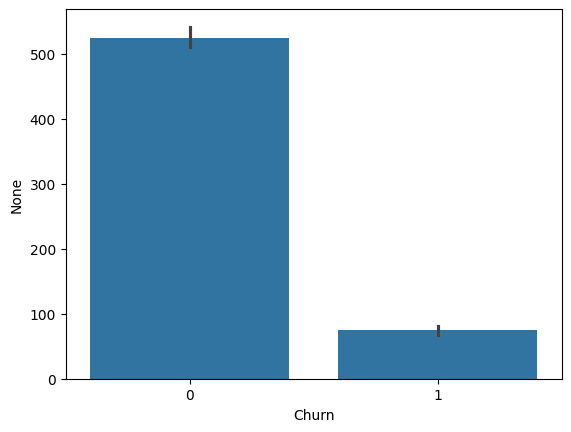

In [40]:
sns.barplot(x="Churn",
            y=df.Churn.index,
            data=df);

there is no need to turn all spark data into pandas data.

Reduce data according to requirement  then visualize it.

In [41]:
a = spark_df.groupBy("Churn").count().toPandas()
a

,Churn,count
0,1,150
1,0,750


In [42]:
type(a)

pandas.core.frame.DataFrame

büyük veri nasıl görselleştirilir?
büyük veri localde görselleştirilemez. zaten bigdata olduğundan localde işlenemediğinden spark, hadoop gibi gereksinimler doğmuştur.
bu durumda veri indirgenerek görselleştirilebilir.


## Big Data Preprocessing

In [43]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



#### standartization of columns name

In [44]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])

In [45]:
spark_df = spark_df.withColumnRenamed("_c0", "index")

In [46]:
spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



#### Descriptive Statistics

In [47]:
spark_df.count()

900

In [48]:
len(spark_df.columns)

8

In [49]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [50]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         NULL|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         NULL|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

#### Preprocessing

In [51]:
spark_df = spark_df.dropna()

In [52]:
spark_df.count()

900

In [53]:
# new column adding
# we change age column dtype float to int
spark_df = spark_df.withColumn("age", spark_df.age.cast("int"))

In [54]:
spark_df.show(3)

+-----+----------------+---+--------------+---------------+-----+---------+-----+
|index|           names|age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+---+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams| 42|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller| 41|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano| 38|      12884.75|              0| 6.67|     12.0|    1|
+-----+----------------+---+--------------+---------------+-----+---------+-----+
only showing top 3 rows



#### Specifying the dependent variable (label)

In [55]:
from pyspark.ml.feature import StringIndexer

In [56]:
stringIndexer = StringIndexer(inputCol="churn", outputCol="label")
label_model = stringIndexer.fit(spark_df)
indexed = label_model.transform(spark_df)
spark_df = indexed.withColumn("label", indexed["label"].cast("integer"))

In [57]:
spark_df.show(3)

+-----+----------------+---+--------------+---------------+-----+---------+-----+-----+
|index|           names|age|total_purchase|account_manager|years|num_sites|churn|label|
+-----+----------------+---+--------------+---------------+-----+---------+-----+-----+
|    0|Cameron Williams| 42|       11066.8|              0| 7.22|      8.0|    1|    1|
|    1|   Kevin Mueller| 41|      11916.22|              0|  6.5|     11.0|    1|    1|
|    2|     Eric Lozano| 38|      12884.75|              0| 6.67|     12.0|    1|    1|
+-----+----------------+---+--------------+---------------+-----+---------+-----+-----+
only showing top 3 rows



#### bağımsız değişkenlerin ayarlanması

In [58]:
from pyspark.ml.feature import VectorAssembler

In [59]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'label']

In [60]:
independent_var = ['age', 'total_purchase', 'account_manager', 'years', 'num_sites']

In [61]:
vectorAssembler = VectorAssembler(inputCols=independent_var, outputCol="features")
va_df = vectorAssembler.transform(spark_df)

In [62]:
va_df.show(3)

+-----+----------------+---+--------------+---------------+-----+---------+-----+-----+--------------------+
|index|           names|age|total_purchase|account_manager|years|num_sites|churn|label|            features|
+-----+----------------+---+--------------+---------------+-----+---------+-----+-----+--------------------+
|    0|Cameron Williams| 42|       11066.8|              0| 7.22|      8.0|    1|    1|[42.0,11066.8,0.0...|
|    1|   Kevin Mueller| 41|      11916.22|              0|  6.5|     11.0|    1|    1|[41.0,11916.22,0....|
|    2|     Eric Lozano| 38|      12884.75|              0| 6.67|     12.0|    1|    1|[38.0,12884.75,0....|
+-----+----------------+---+--------------+---------------+-----+---------+-----+-----+--------------------+
only showing top 3 rows



#### dataset creation

In [63]:
final_df = va_df.select(['features', 'label'])
final_df.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,0.0...|    1|
|[41.0,11916.22,0....|    1|
|[38.0,12884.75,0....|    1|
+--------------------+-----+
only showing top 3 rows



#### test-train dataset creation

In [64]:
splits = final_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [65]:
train_df

DataFrame[features: vector, label: int]

In [66]:
train_df.show(3)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[22.0,11254.38,1....|    0|
|[25.0,9672.03,0.0...|    0|
|[26.0,8939.61,0.0...|    0|
+--------------------+-----+
only showing top 3 rows



## GBM ile Müşteri Terk Modellemesi

RandomForest'a dayalı bir model

In [67]:
from pyspark.ml.classification import GBTClassifier

In [68]:
gbm = GBTClassifier(maxIter = 10, featuresCol="features", labelCol="label")

In [69]:
gbm_model = gbm.fit(train_df)

In [70]:
y_pred = gbm_model.transform(test_df)

In [71]:
y_pred

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [72]:
ac = y_pred.select("label", "prediction")

In [73]:
# accuracy calculation
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8664122137404581

## model tuning

In [74]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [77]:
evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder()
             .addGrid(gbm.maxDepth, [2, 4, 6])
             .addGrid(gbm.maxBins, [20, 30])
             .addGrid(gbm.maxIter, [10, 20])
             .build())

cv = CrossValidator(estimator=gbm, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=10)

In [78]:
cvModel = cv.fit(train_df)

In [79]:
y_pred = cvModel.transform(test_df)

In [80]:
ac = y_pred.select("label", "prediction")

In [81]:
# accuracy calculation
ac.filter(ac.label == ac.prediction).count() / ac.count()

0.8816793893129771

yeni müşteri terk eder mi etmez mi?

In [83]:
import pandas as pd

names = pd.Series(["Ali Ahmetoğlu", "Taner Gün", "Berkay", "Polat Konak", "Kamil Atasoy"])
ages = pd.Series([38, 43, 34, 50, 40])
total_purchases = pd.Series([30000, 10000, 6000, 30000, 100000])
account_managers = pd.Series([1, 0, 0, 1, 1])
years = pd.Series([20, 10, 3, 8, 30])
num_sites = pd.Series([30, 8, 8, 6, 50])

new_customers = pd.DataFrame({
    "names": names,
    "age": ages,
    "total_purchase": total_purchases,
    "account_manager": account_managers,
    "years": years,
    "num_sites": num_sites
})

new_customers.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [84]:
# bigdata'ya uygun bir forma dönüştüreceğiz
# kurduğumuz modelde kullanabilmek üzere sparkın anlayacağı bir forma dönüştüreceğiz

new_sdf = spark.createDataFrame(new_customers)

In [85]:
new_sdf.show()

+-------------+---+--------------+---------------+-----+---------+
|        names|age|total_purchase|account_manager|years|num_sites|
+-------------+---+--------------+---------------+-----+---------+
|Ali Ahmetoğlu| 38|         30000|              1|   20|       30|
|    Taner Gün| 43|         10000|              0|   10|        8|
|       Berkay| 34|          6000|              0|    3|        8|
|  Polat Konak| 50|         30000|              1|    8|        6|
| Kamil Atasoy| 40|        100000|              1|   30|       50|
+-------------+---+--------------+---------------+-----+---------+



In [86]:
# bağımsız değişkenleri vektör hale getirip kullanmıştık
new_customers = vectorAssembler.transform(new_sdf)

In [87]:
new_customers.show()

+-------------+---+--------------+---------------+-----+---------+--------------------+
|        names|age|total_purchase|account_manager|years|num_sites|            features|
+-------------+---+--------------+---------------+-----+---------+--------------------+
|Ali Ahmetoğlu| 38|         30000|              1|   20|       30|[38.0,30000.0,1.0...|
|    Taner Gün| 43|         10000|              0|   10|        8|[43.0,10000.0,0.0...|
|       Berkay| 34|          6000|              0|    3|        8|[34.0,6000.0,0.0,...|
|  Polat Konak| 50|         30000|              1|    8|        6|[50.0,30000.0,1.0...|
| Kamil Atasoy| 40|        100000|              1|   30|       50|[40.0,100000.0,1....|
+-------------+---+--------------+---------------+-----+---------+--------------------+



In [89]:
results = cvModel.transform(new_customers)

In [90]:
results.select("names", "prediction").show()

+-------------+----------+
|        names|prediction|
+-------------+----------+
|Ali Ahmetoğlu|       1.0|
|    Taner Gün|       0.0|
|       Berkay|       0.0|
|  Polat Konak|       0.0|
| Kamil Atasoy|       1.0|
+-------------+----------+



## End Session

In [ ]:
spark.stop()

In [ ]:
ngrok.kill()